## 설계예산서 라벨링

In [24]:
import pandas as pd
import json

with open("data/construct/preprocessed/budget/b_image_01.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df


,공종,전체 당초,전체 변경,전체 증감(△),기시행,금회 당초,금회 변경,금회 증감(△),비고
0,총 공사비,"75,504,000,000","73,564,143,300","△ 1,939,856,700","3,050,000,000","72,454,000,000","70,514,143,300","△ 1,939,856,700",
1,I. 도급액,"74,162,000,000","72,222,143,300","△ 1,939,856,700","3,045,000,000","71,117,000,000","69,177,143,300","△ 1,939,856,700",
2,1. 토공,"10,025,778,856","9,167,387,224","△ 858,391,632","237,031,300","9,788,747,556","8,930,355,924","△ 858,391,632",
3,2. 비탈면 안정공,"1,805,123,756","2,004,757,824","199,634,068",-,"1,805,123,756","2,004,757,824","199,634,068",
4,3. 배수공,"7,036,514,208","6,415,369,072","△ 621,145,136","448,479,690","6,588,034,518","5,966,889,382","△ 621,145,136",
5,4. 구조물공,"16,200,742,748","16,120,710,966","△ 80,031,782","1,671,360,323","14,529,382,425","14,449,347,716","△ 80,034,709",
6,5. 포장공,"7,567,197,052","7,594,928,460","27,731,408","5,511,800","7,561,685,252","7,589,416,660","27,731,408",
7,6. 교통 안전 시설공,"3,015,780,690","3,252,886,440","237,105,750",-,"3,015,780,690","3,252,886,440","237,105,750",
8,7. 부대공,"5,069,510,668","5,409,824,945","340,314,277","51,612,400","5,017,898,268","5,358,212,545","340,314,277",
9,순공사비계,"50,720,647,978","49,965,864,931","△ 754,783,047","2,413,995,513","48,306,652,465","47,551,866,491","△ 754,785,974",


In [2]:
import os
import json

# 1. 저장할 디렉토리 경로 설정
output_dir = "data/construct/preprocessed/budget"  
os.makedirs(output_dir, exist_ok=True)

# 2. 생성할 파일 이름 목록
file_names = []

# "b_image_01.json" ~ "b_image_50.json"
file_names += [f"b_image_{i:02}.json" for i in range(1, 51)]

# "r_image_01.json" ~ "r_image_50.json"
# file_names += [f"r_image_{i:02}.json" for i in range(1, 51)]

print(file_names[:3])
print(file_names[-3:])

['b_image_01.json', 'b_image_02.json', 'b_image_03.json']
['b_image_48.json', 'b_image_49.json', 'b_image_50.json']


In [3]:

# 3. 빈 JSON 파일 생성
for name in file_names:
    file_path = os.path.join(output_dir, name)
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump({}, f, ensure_ascii=False, indent=2)  # 빈 딕셔너리 저장

print(f"{len(file_names)}개의 빈 JSON 파일이 생성되었습니다.")

50개의 빈 JSON 파일이 생성되었습니다.


In [11]:
!pip install paddleocr paddlepaddle

  Using cached PyYAML-6.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached charset_normalizer-3.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached attrs-25.3.0-py3-none-an

In [18]:
import paddleocr
import os

print(os.path.dirname(paddleocr.__file__))

/home/skhong/ocr_proj/.conda/lib/python3.9/site-packages/paddleocr


In [20]:
!ls ~/.paddleocr/whl

ls: cannot access '/home/skhong/.paddleocr/whl': No such file or directory


In [21]:
# Initialize PaddleOCR instance
from paddleocr import PaddleOCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False)

# Run OCR inference on a sample image 
result = ocr.predict(
    input="https://paddle-model-ecology.bj.bcebos.com/paddlex/imgs/demo_image/general_ocr_002.png")

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /home/skhong/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /home/skhong/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]
Connecting to https://paddle-model-ecology.bj.bcebos.com/paddlex/imgs/demo_image/general_ocr_002.png ...
[==================================================] 100.00%
{'res': {'input_path': '/home/skhong/.paddlex/predict_input/general_ocr_002.png', 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_orientation_classify': False, 'use_doc_unwar

In [23]:
# Initialize PaddleOCR instance
from paddleocr import PaddleOCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False)

# Run OCR inference on a sample image 
result = ocr.predict(
    input="data/construct/raw/b_image_02.png")

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /home/skhong/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 3000.58it/s]
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /home/skhong/.paddlex/official_models.
Fetching 6 files: 100%|██████████| 6/6 [00:00<00:00, 3949.44it/s]
{'res': {'input_path': 'data/construct/raw/b_image_02.png', 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_orientation_classify': False, 'use_doc_unwarping': False}, 'angle': -1}, 'dt_polys': array([[[236,   9],
        ...,
        [236,  26]],

       ...,

       [[332, 482],
        ...,
        [332, 494]]], dtype=int16), 'text_

## 설계보고서 라벨링

In [43]:
!pip install label-studio

  Preparing metadata (setup.py) ... done
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached cffi-1.17.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 MB 36.7 MB/s eta 0

In [46]:
# !label-studio start

In [47]:
with open("data/project-1-at-2025-08-02-13-05-d8d7a0f1.json", "r", encoding="utf-8") as f:
    data = json.load(f)
data

[{'id': 1,
  'annotations': [{'id': 1,
    'completed_by': 1,
    'result': [{'original_width': 558,
      'original_height': 783,
      'image_rotation': 0,
      'value': {'x': 12.48944435061645,
       'y': 20.593368237347295,
       'width': 81.30383381185611,
       'height': 18.673647469458988,
       'rotation': 0,
       'rectanglelabels': ['Text']},
      'id': 'twA6HrkAMw',
      'from_name': 'label',
      'to_name': 'image',
      'type': 'rectanglelabels',
      'origin': 'manual'},
     {'original_width': 558,
      'original_height': 783,
      'image_rotation': 0,
      'value': {'x': 13.469008613409898,
       'y': 45.89877835951135,
       'width': 78.36514102347577,
       'height': 10.994764397905755,
       'rotation': 0,
       'rectanglelabels': ['Text']},
      'id': 'H1tOe8pN_P',
      'from_name': 'label',
      'to_name': 'image',
      'type': 'rectanglelabels',
      'origin': 'manual'},
     {'original_width': 558,
      'original_height': 783,
      'imag

In [48]:
len(data)

50

In [52]:
data[0]['data']['image']

'/data/upload/1/7fc7a70d-r_image_01.png'

In [1]:
import json
import os
import re

# 원본 Label Studio JSON 경로
input_json_path = "data/project-1-at-2025-08-02-13-05-d8d7a0f1.json"
output_dir = "data/construct/preprocessed/report/"  # 저장할 디렉토리

# 디렉토리가 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# JSON 파일 읽기
with open(input_json_path, "r", encoding="utf-8") as f:
    all_data = json.load(f)

pattern = r"(r_image_\d{2}\.png|b_image_\d{2}\.png)"

for item in all_data:
    image_path = item.get("data", {}).get("image", "")
    match = re.search(pattern, image_path)
    
    if match:
        image_filename = match.group(1)
        json_filename = os.path.splitext(image_filename)[0] + ".json"
        output_path = os.path.join(output_dir, json_filename)

        with open(output_path, "w", encoding="utf-8") as out_f:
            json.dump(item, out_f, indent=2, ensure_ascii=False)
    else:
        print(f"파일 이름 추출 실패: {image_path}")

print(f"총 {len(all_data)}개의 항목 중 정상 추출된 JSON이 '{output_dir}/'에 저장되었습니다.")


총 50개의 항목 중 정상 추출된 JSON이 'data/construct/preprocessed/report//'에 저장되었습니다.


In [1]:
import json

with open("data/construct/preprocessed/report/r_image_01.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['id', 'annotations', 'file_upload', 'drafts', 'predictions', 'data', 'meta', 'created_at', 'updated_at', 'inner_id', 'total_annotations', 'cancelled_annotations', 'total_predictions', 'comment_count', 'unresolved_comment_count', 'last_comment_updated_at', 'project', 'updated_by', 'comment_authors'])

In [15]:
data['annotations'][0]['result']

[{'original_width': 558,
  'original_height': 783,
  'image_rotation': 0,
  'value': {'x': 12.48944435061645,
   'y': 20.593368237347295,
   'width': 81.30383381185611,
   'height': 18.673647469458988,
   'rotation': 0,
   'rectanglelabels': ['Text']},
  'id': 'twA6HrkAMw',
  'from_name': 'label',
  'to_name': 'image',
  'type': 'rectanglelabels',
  'origin': 'manual'},
 {'original_width': 558,
  'original_height': 783,
  'image_rotation': 0,
  'value': {'x': 13.469008613409898,
   'y': 45.89877835951135,
   'width': 78.36514102347577,
   'height': 10.994764397905755,
   'rotation': 0,
   'rectanglelabels': ['Text']},
  'id': 'H1tOe8pN_P',
  'from_name': 'label',
  'to_name': 'image',
  'type': 'rectanglelabels',
  'origin': 'manual'},
 {'original_width': 558,
  'original_height': 783,
  'image_rotation': 0,
  'value': {'x': 13.469008613409898,
   'y': 60.73298429319372,
   'width': 77.87535889207905,
   'height': 8.202443280977313,
   'rotation': 0,
   'rectanglelabels': ['Text']},
  

In [3]:
import cv2
import json
import os

# 1. 파일 경로 설정
# JSON 파일과 이미지 파일의 경로를 지정합니다.
# 두 파일이 스크립트와 같은 폴더에 있다고 가정합니다.
json_file_path = 'data/construct/preprocessed/report/r_image_01.json'
image_filename_in_json = '7fc7a70d-r_image_01.png' # JSON 데이터에 명시된 파일 이름
image_file_path = 'data/construct/raw/r_image_01.png' # 실제 이미지 파일 이름

# 2. JSON 파일 읽기
try:
    with open(json_file_path, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"오류: '{json_file_path}' 파일을 찾을 수 없습니다.")
    exit()

# 3. 이미지 파일 불러오기
try:
    image = cv2.imread(image_file_path)
    if image is None:
        raise FileNotFoundError
except FileNotFoundError:
    print(f"오류: '{image_file_path}' 이미지를 찾을 수 없습니다.")
    exit()
    
# 이미지의 높이와 너비 가져오기
image_height, image_width, _ = image.shape

# 4. Bbox 정보 추출 및 사각형 그리기
# JSON 구조에 맞게 annotations 리스트를 가져옵니다.
annotations = data['annotations'][0]['result']

# 각 Bbox에 대해 반복
for annotation in annotations:
    bbox = annotation['value']

    # 퍼센트(%) 단위의 좌표를 픽셀 단위로 변환
    # x1, y1: 사각형의 왼쪽 위 꼭짓점
    x1 = int((bbox['x'] / 100) * image_width)
    y1 = int((bbox['y'] / 100) * image_height)
    
    # 너비와 높이를 픽셀 단위로 변환
    box_width = int((bbox['width'] / 100) * image_width)
    box_height = int((bbox['height'] / 100) * image_height)

    # x2, y2: 사각형의 오른쪽 아래 꼭짓점
    x2 = x1 + box_width
    y2 = y1 + box_height

    # 이미지에 초록색 사각형 그리기
    # cv2.rectangle(이미지, 시작점, 끝점, 색상, 두께)
    # 색상(BGR 순서): (0, 255, 0)은 초록색입니다.
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 5. 결과 이미지 저장 및 출력
output_filename = 'result_image.png'
cv2.imwrite(output_filename, image)

: 

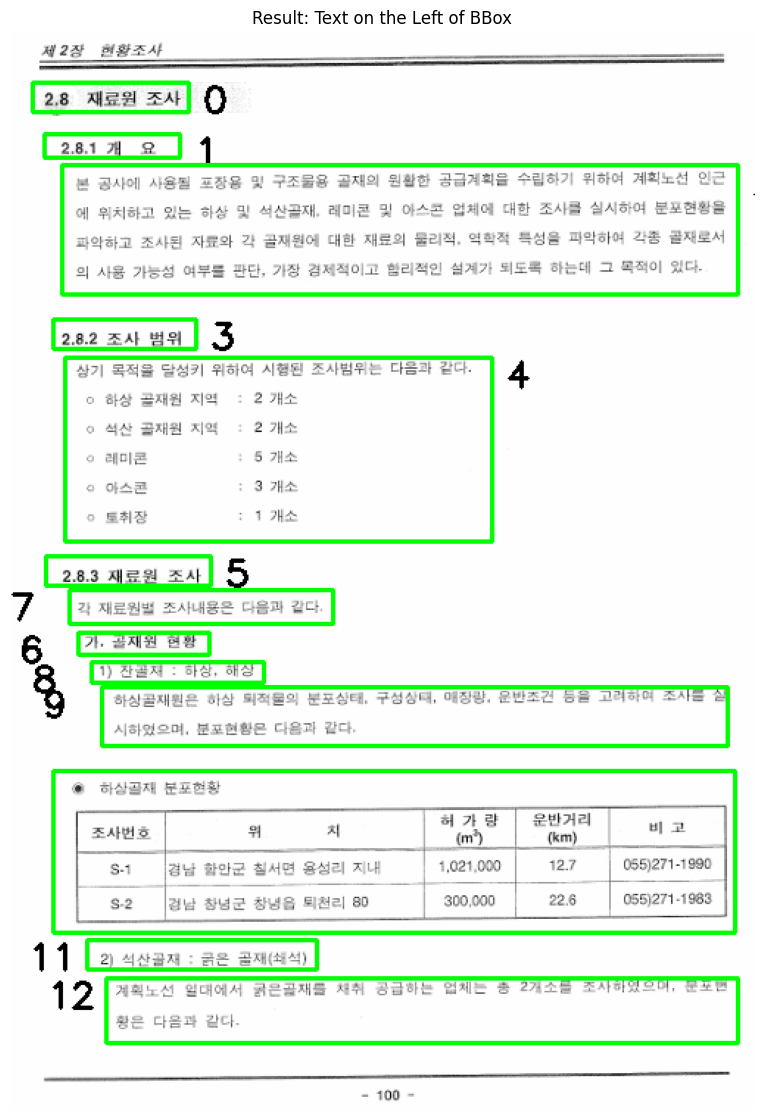

In [11]:
import cv2
import json
import matplotlib.pyplot as plt

# 1. 파일 경로 설정
json_file_path = 'data/construct/preprocessed/report/r_image_50.json'
image_file_path = 'data/construct/raw/r_image_50.png' 

# 2. JSON 파일 및 이미지 불러오기
try:
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    image = cv2.imread(image_file_path)
    if image is None:
        raise FileNotFoundError(f"'{image_file_path}' 파일을 찾거나 열 수 없습니다.")

except FileNotFoundError as e:
    print(f"오류: {e}")
    
else:
    # 이미지의 높이와 너비 가져오기
    image_height, image_width, _ = image.shape

    # 3. Bbox 정보 추출 및 사각형과 인덱스 그리기
    annotations = data['annotations'][0]['result']
    
    for i, annotation in enumerate(annotations):
        bbox = annotation['value']

        # 퍼센트(%) 좌표를 픽셀 좌표로 변환
        x1 = int((bbox['x'] / 100) * image_width)
        y1 = int((bbox['y'] / 100) * image_height)
        width = int((bbox['width'] / 100) * image_width)
        height = int((bbox['height'] / 100) * image_height)
        x2 = x1 + width
        y2 = y1 + height

        # 초록색 사각형 그리기
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # ✨ 텍스트 위치를 박스 왼쪽으로 조정하는 부분 ✨
        label = str(i)
        
        # 텍스트의 기본 위치를 박스 왼쪽 상단으로 설정
        text_y = y1 + 20 # y좌표는 박스 상단에서 약간 아래로
        
        # 만약 박스가 너무 왼쪽에 붙어있으면 텍스트를 오른쪽에 표시
        if x1 < 40:
             text_x = x2 + 10
        else: # 그렇지 않으면 왼쪽에 표시
             text_x = x1 - 40
        
        # 이미지에 텍스트 쓰기 (노란색)
        cv2.putText(image, label, (text_x, text_y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    # 4. Jupyter Notebook에 최종 이미지 표시
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 14))
    plt.imshow(image_rgb)
    plt.title('Result: Text on the Left of BBox')
    plt.axis('off')
    plt.show()

# AI-HUB data labeling

## .pptx 파일 처리

In [54]:
!pip install opencv-python matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached contourpy-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 45.3 MB/s eta 0:00:0000:0100:01
Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (321 kB)
Us

In [1]:
import json
import cv2
import matplotlib.pyplot as plt

In [ ]:
import os
import json

# 변환 상수
EMU_PER_INCH = 914400
DPI = 96
EMU_TO_PX = DPI / EMU_PER_INCH

# 경로 설정
json_dir = "data/ai_hub/raw/annotations"
output_dir = "data/ai_hub/preprocessed/converted_annotations"
os.makedirs(output_dir, exist_ok=True)

# 모든 JSON 파일 처리
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        json_path = os.path.join(json_dir, filename)

        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)

        # 좌표 변환 수행
        for item in data.get("image_info", []):
            x, y, w, h = item["image_location"]
            x_px = int(x * EMU_TO_PX)
            y_px = int(y * EMU_TO_PX)
            w_px = int(w * EMU_TO_PX)
            h_px = int(h * EMU_TO_PX)
            item["image_location"] = [x_px, y_px, w_px, h_px]

        # 결과 저장
        output_path = os.path.join(output_dir, filename)
        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=2)

print("✅ 모든 JSON 파일의 좌표 변환이 완료되었습니다.")


In [20]:
import os
idx = 0
json_dir = "data/ai_hub/raw/annotations"
output_dir = "data/ai_hub/preprocessed/converted_annotations"
os.makedirs(output_dir, exist_ok=True)


In [21]:

for filename in sorted(os.listdir(json_dir)):
    if filename.endswith(".json"):
        json_path = os.path.join(json_dir, filename)
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
            
        for item in data['training_data_info'].get("image_info", []):
            bbox_str = item["image_location"]
            bbox = [int(x) for x in bbox_str.strip('[]').split(',')]
            x, y, w, h = bbox
            x_px = int(x * EMU_TO_PX)
            y_px = int(y * EMU_TO_PX)
            w_px = int(w * EMU_TO_PX)
            h_px = int(h * EMU_TO_PX)
            item["image_location"] = [x_px, y_px, w_px, h_px]
        # 결과 저장
        output_path = os.path.join(output_dir, filename)
        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=2)

print("✅ 모든 JSON 파일의 좌표 변환이 완료되었습니다.")



✅ 모든 JSON 파일의 좌표 변환이 완료되었습니다.


In [23]:
import numpy as np
img_data = np.fromfile('data/ai_hub/preprocessed/pptx_png/HA_0032_0013970.png', dtype=np.uint8)
image = cv2.imdecode(img_data, cv2.IMREAD_COLOR)

with open('data/ai_hub/raw/annotations/HA_0032_0013970.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

img_info = data['training_data_info']['image_info'][0]
bbox_str = img_info['image_location'] 


In [24]:
data['training_data_info'].keys()

dict_keys(['section_info', 'image_info'])

변환 후 bbox(px): 140 3475 1219 746


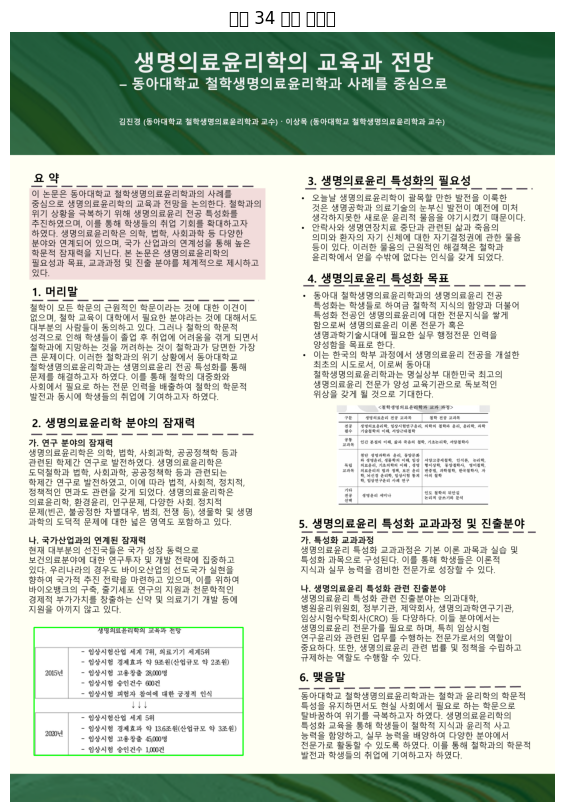

In [25]:
bbox = [int(x) for x in bbox_str.strip('[]').split(',')]
x, y, w, h = bbox

EMU_PER_INCH = 914400
DPI = 96  # PowerPoint PNG export 기본 DPI
EMU_TO_PX = DPI / EMU_PER_INCH  # 1 EMU를 픽셀로 변환하는 비율

x_px = int(x * EMU_TO_PX)
y_px = int(y * EMU_TO_PX)
w_px = int(w * EMU_TO_PX)
h_px = int(h * EMU_TO_PX)

print("변환 후 bbox(px):", x_px, y_px, w_px, h_px)


vis_img = image.copy()
cv2.rectangle(vis_img, (x_px, y_px), (x_px + w_px, y_px + h_px), (0, 255, 0), 5)  # 초록색 박스

# === 7. matplotlib으로 시각화 (RGB로 변환) ===
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title(f"{img_info['image_name']} 위치 시각화")
plt.axis('off')
plt.show()

/home/skhong/ocr_proj/.conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/skhong/ocr_proj/.conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/skhong/ocr_proj/.conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/skhong/ocr_proj/.conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/skhong/ocr_proj/.conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE M

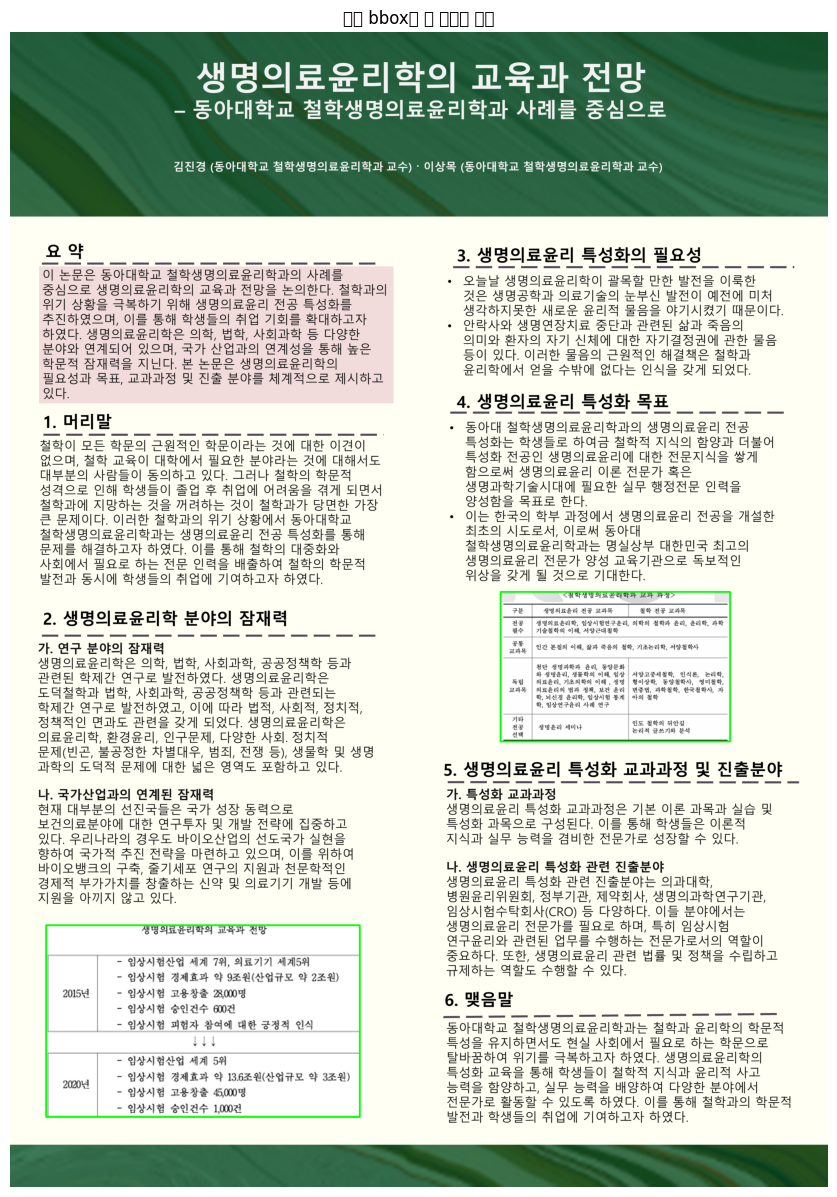

In [26]:
length = len(data['training_data_info']['image_info'])
for i in range(length):
    bbox_str = data['training_data_info']['image_info'][i]['image_location']
    x, y, w, h = [int(v) for v in bbox_str.strip('[]').split(',')]

    x_px = int(x * EMU_TO_PX)
    y_px = int(y * EMU_TO_PX)
    w_px = int(w * EMU_TO_PX)
    h_px = int(h * EMU_TO_PX)

    # 누적해서 그리기
    cv2.rectangle(vis_img, (x_px, y_px), (x_px + w_px, y_px + h_px), (0, 255, 0), 5)

# ===== 루프 끝나고 한 번만 출력 =====
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("모든 bbox를 한 화면에 표시")
plt.show()

## .pdfs 파일 처리

In [1]:
import os

path = "data/ai_hub/preprocessed/pdf_png"
file_count = 0
for item in os.listdir(path):
    if os.path.isfile(os.path.join(path, item)):
        file_count += 1

print(f"파일 개수: {file_count}")

파일 개수: 100


In [1]:
!label-studio start

=> Database and media directory: /home/skhong/.local/share/label-studio
=> Static URL is set to: /static/
=> Database and media directory: /home/skhong/.local/share/label-studio
=> Static URL is set to: /static/
Read environment variables from: /home/skhong/.local/share/label-studio/.env
get 'SECRET_KEY' casted as '<class 'str'>' with default ''
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /pypi/label-studio/json HTTP/1.1" 200 35289
╔════════════════════════════════╗                                              
║Update available 1.15.0 → 1.20.0║                                              
║Run pip install -U label-studio ║                                              
╚════════════════════════════════╝                                              

August 05, 2025 - 22:51:38
Django version 4.2.23, using settings 'label_studio.core.settings.label_studio'
Starting development server at http://0.0.0.0:8080/
Quit the server with CONTROL-C.

[2025-08-05 22:51

In [12]:
import os
import json

# 이미지를 읽어올 폴더와 JSON 파일을 저장할 폴더 경로를 지정합니다.
source_dir = 'data/ai_hub/preprocessed/pdf_png'
dest_dir = 'data/ai_hub/preprocessed/pdf_annotation'

# JSON 파일을 저장할 폴더가 없으면 새로 생성합니다.
# exist_ok=True 옵션은 폴더가 이미 있어도 오류를 발생시키지 않습니다.
os.makedirs(dest_dir, exist_ok=True)

# 원본 이미지 폴더(source_dir)에 있는 모든 파일 목록을 가져옵니다.
for filename in os.listdir(source_dir):
    # 파일명이 .png로 끝나는 경우에만 처리합니다.
    if filename.endswith('.png'):
        
        # 1. 파일명에서 '.png' 확장자를 제거합니다.
        # os.path.splitext()는 파일명과 확장자를 분리해주는 편리한 함수입니다.
        base_name = os.path.splitext(filename)[0]
        
        # 2. 새로운 JSON 파일명을 만듭니다. (예: HA_0032_0013970.json)
        json_filename = base_name + '.json'
        
        # 3. JSON 파일을 저장할 전체 경로를 만듭니다.
        # os.path.join()은 운영체제에 맞춰 경로를 안전하게 합쳐줍니다.
        json_filepath = os.path.join(dest_dir, json_filename)
        
        # 4. 비어있는 JSON 파일을 생성합니다.
        # with open ... as f: 구문은 파일을 열고 작업이 끝나면 자동으로 닫아줍니다.
        # 내용은 비어있는 딕셔너리 {} 를 넣어 유효한 JSON 형식으로 만듭니다.
        with open(json_filepath, 'w', encoding='utf-8') as f:
            json.dump({}, f)
            
        print(f"생성 완료: {json_filepath}")

print("\n모든 PNG 파일에 대한 빈 JSON 파일 생성을 완료했습니다.")

생성 완료: data/ai_hub/preprocessed/pdf_annotation/SS_0015_0039940.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/HA_0051_0014801.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/ST_0028_0010105.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/SS_0017_0087533.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/SS_0015_0035417.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/HA_0051_0015185.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/HA_0047_0035799.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/ST_0028_0010044.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/SS_0015_0034296.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/ST_0028_0010204.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/SS_0015_0033322.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/SS_0015_0030089.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/ST_0028_0032023.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/ST_0028_0010472.json
생성 완료: data/ai_hub/preprocessed/pdf_annotation/H

In [13]:
import os
import json

# JSON 데이터를 담고 있는 원본 파일
source_json_file = 'data/project-2-at-2025-08-05-23-47-442d3d48.json'

# 개별 JSON 파일을 저장할 폴더
dest_dir = 'data/ai_hub/preprocessed/pdf_annotation'

# 저장 폴더가 없으면 생성
os.makedirs(dest_dir, exist_ok=True)

# 1. 원본 JSON 파일 열기
try:
    with open(source_json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"오류: 원본 JSON 파일 '{source_json_file}'을 찾을 수 없습니다.")
    print("스크립트와 같은 폴더에 파일이 있는지 확인하세요.")
    exit() # 파일이 없으면 프로그램 종료

# 2. 데이터 처리 및 개별 파일로 저장
for item in data:
    # 'file_upload' 키가 있는지 확인
    if 'file_upload' in item:
        file_upload_value = item['file_upload']
        
        # 파일명 형식 (예: "e178ae59-ST_0028_0010105.png") 에서 필요한 부분 추출
        # 첫 번째 '-' 이후의 문자열을 가져옵니다.
        try:
            base_name_with_ext = file_upload_value.split('-', 1)[1]
            # 추출된 이름에서 확장자(.png)를 제거합니다.
            base_name = os.path.splitext(base_name_with_ext)[0]
        except IndexError:
            print(f"경고: '{file_upload_value}'에서 파일명을 추출할 수 없습니다. 건너뜁니다.")
            continue # 다음 항목으로 넘어감

        # 저장할 JSON 파일명과 경로 생성
        json_filename = base_name + '.json'
        json_filepath = os.path.join(dest_dir, json_filename)
        
        # 해당 파일이 존재하는지 확인하고 내용 저장
        if os.path.exists(json_filepath):
            try:
                # 딕셔너리 전체(item)를 JSON 파일에 덮어쓰기
                with open(json_filepath, 'w', encoding='utf-8') as f:
                    # json.dump()를 사용하여 보기 좋게 들여쓰기(indent) 된 형태로 저장
                    json.dump(item, f, ensure_ascii=False, indent=4)
                print(f"저장 완료: {json_filename}")
            except Exception as e:
                print(f"오류: '{json_filename}' 파일 저장 중 문제 발생 - {e}")
        else:
            # 아까 생성해 둔 파일이 없는 경우 경고 메시지 출력
            print(f"경고: '{json_filename}' 파일이 '{dest_dir}' 폴더에 존재하지 않습니다.")

print("\n모든 데이터 저장을 완료했습니다.")

저장 완료: ST_0028_0010105.json
저장 완료: ST_0028_0010106.json
저장 완료: ST_0028_0010138.json
저장 완료: ST_0028_0010142.json
저장 완료: ST_0028_0010173.json
저장 완료: ST_0028_0010204.json
저장 완료: ST_0028_0010285.json
저장 완료: ST_0028_0010288.json
저장 완료: ST_0028_0010357.json
저장 완료: ST_0028_0010417.json
저장 완료: ST_0028_0010472.json
저장 완료: ST_0028_0010542.json
저장 완료: ST_0028_0010545.json
저장 완료: ST_0028_0028384.json
저장 완료: ST_0028_0028391.json
저장 완료: ST_0028_0029611.json
저장 완료: ST_0028_0029907.json
저장 완료: ST_0028_0031488.json
저장 완료: ST_0028_0032023.json
저장 완료: ST_0028_0032034.json
저장 완료: HA_0032_0013970.json
저장 완료: HA_0039_0012075.json
저장 완료: HA_0039_0012156.json
저장 완료: HA_0039_0012562.json
저장 완료: HA_0039_0012746.json
저장 완료: HA_0039_0012778.json
저장 완료: HA_0039_0013059.json
저장 완료: HA_0039_0013089.json
저장 완료: HA_0047_0034701.json
저장 완료: HA_0047_0035799.json
저장 완료: HA_0047_0036280.json
저장 완료: HA_0047_0036535.json
저장 완료: HA_0047_0036824.json
저장 완료: HA_0047_0037121.json
저장 완료: HA_0047_0037681.json
저장 완료: HA_0047_00377

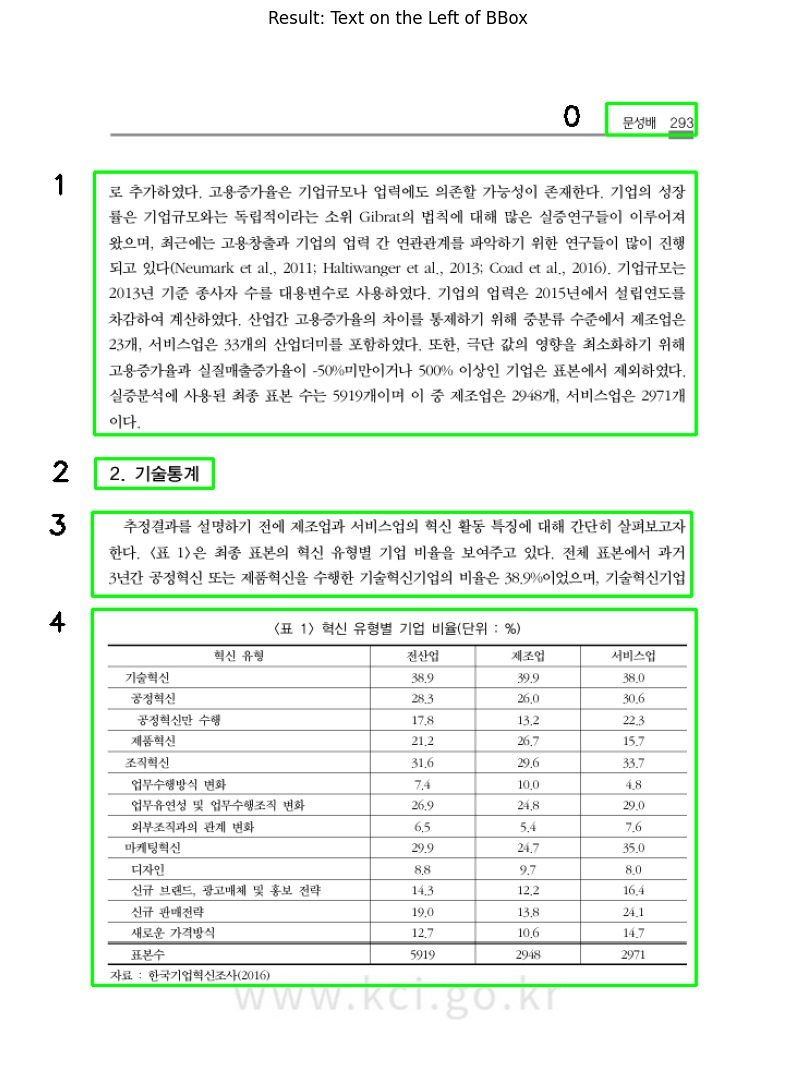

In [79]:
import cv2
import json
import matplotlib.pyplot as plt

# 1. 파일 경로 설정
json_file_path = 'data/ai_hub/preprocessed/pdf_annotation/ST_0028_0032034.json'
image_file_path = 'data/ai_hub/preprocessed/pdf_png/ST_0028_0032034.png' 

# 2. JSON 파일 및 이미지 불러오기
try:
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    image = cv2.imread(image_file_path)
    if image is None:
        raise FileNotFoundError(f"'{image_file_path}' 파일을 찾거나 열 수 없습니다.")

except FileNotFoundError as e:
    print(f"오류: {e}")
    
else:
    # 이미지의 높이와 너비 가져오기
    image_height, image_width, _ = image.shape

    # 3. Bbox 정보 추출 및 사각형과 인덱스 그리기
    annotations = data['annotations'][0]['result']
    
    for i, annotation in enumerate(annotations):
        bbox = annotation['value']

        # 퍼센트(%) 좌표를 픽셀 좌표로 변환
        x1 = int((bbox['x'] / 100) * image_width)
        y1 = int((bbox['y'] / 100) * image_height)
        width = int((bbox['width'] / 100) * image_width)
        height = int((bbox['height'] / 100) * image_height)
        x2 = x1 + width
        y2 = y1 + height

        # 초록색 사각형 그리기
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # ✨ 텍스트 위치를 박스 왼쪽으로 조정하는 부분 ✨
        label = str(i)
        
        # 텍스트의 기본 위치를 박스 왼쪽 상단으로 설정
        text_y = y1 + 20 # y좌표는 박스 상단에서 약간 아래로
        
        # 만약 박스가 너무 왼쪽에 붙어있으면 텍스트를 오른쪽에 표시
        if x1 < 40:
             text_x = x2 + 10
        else: # 그렇지 않으면 왼쪽에 표시
             text_x = x1 - 40
        
        # 이미지에 텍스트 쓰기 (노란색)
        cv2.putText(image, label, (text_x, text_y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    # 4. Jupyter Notebook에 최종 이미지 표시
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 14))
    plt.imshow(image_rgb)
    plt.title('Result: Text on the Left of BBox')
    plt.axis('off')
    plt.show()